The purpose of this project is to see if you have the ability to learn, understand, and analyze financial data quickly. It is also to see your programming and problem solving skills. The data set is from Kenneth French’s website (http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip). 

The relevant columns for market returns are circled in Mkt-RF and RF

Using the above data-set, please provide the following using either R or Python.



## Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl


# Downloading files, to unzip files
import requests, zipfile, io
import requests 

import warnings 
warnings.filterwarnings('ignore')

from scipy.stats import norm, skew
from scipy import stats

plt.style.use('ggplot')
%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')

## Data Description
### Overview

1. SMB (Small Minus Big) is the average return on the three small portfolios minus the average return on the three big portfolios,
 
 SMB = 1/3 (Small Value + Small Neutral + Small Growth) - 1/3 (Big Value + Big Neutral + Big Growth).
 
2. HML (High Minus Low) is the average return on the two value portfolios minus the average return on the two growth portfolios,

HML = 1/2 (Small Value + Big Value) - 1/2 (Small Growth + Big Growth).

3. Rm-Rf: the excess return on the market, value-weight return of all CRSP firms incorporated in the US and listed on the NYSE, AMEX, or NASDAQ that have a CRSP share code of 10 or 11 at the beginning of month t, good shares and price data at the beginning of t, and good return data for t minus the one-month Treasury bill rate (from Ibbotson Associates).

4. Rm-Rf includes all NYSE, AMEX, and NASDAQ firms. SMB and HML for July of year t to June of t+1 include all NYSE, AMEX, and NASDAQ stocks for which we have market equity data for December of t-1 and June of t, and (positive) book equity data for t-1.

5. RF: risk-free rate

From the link: http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_factors.html


## Import dataset

In [2]:
url = 'http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip'
# get the file
r = requests.get(url) 

# unzip the file
z = zipfile.ZipFile(io.BytesIO(r.content)) 

#convert from percent to decimal
# first 4 rows and the last row should be skipped
df = pd.read_csv(z.open(z.namelist()[0]), skiprows=4, index_col=0)[:-1]/100 

# interpret index as dates
df.index = pd.to_datetime(df.index) 
df

,Mkt-RF,SMB,HML,RF
1926-07-01,0.0010,-0.0023,-0.0028,0.00009
1926-07-02,0.0045,-0.0034,-0.0003,0.00009
1926-07-06,0.0017,0.0029,-0.0038,0.00009
1926-07-07,0.0009,-0.0059,0.0000,0.00009
1926-07-08,0.0021,-0.0038,0.0018,0.00009
...,...,...,...,...
2021-07-26,0.0018,-0.0008,0.0134,0.00000
2021-07-27,-0.0067,-0.0066,0.0061,0.00000
2021-07-28,0.0028,0.0140,-0.0065,0.00000
2021-07-29,0.0042,0.0000,0.0096,0.00000


## Question 1: 
Descriptive statistics and analysis on the distribution of stock market returns ( things like histograms, mean, median, standard deviation)

In [3]:
#let's save it to a dataframe (we just need the rf and the Mkt-RF)
ff = df.loc[:,['Mkt-RF', 'RF']]
ff

,Mkt-RF,RF
1926-07-01,0.0010,0.00009
1926-07-02,0.0045,0.00009
1926-07-06,0.0017,0.00009
1926-07-07,0.0009,0.00009
1926-07-08,0.0021,0.00009
...,...,...
2021-07-26,0.0018,0.00000
2021-07-27,-0.0067,0.00000
2021-07-28,0.0028,0.00000
2021-07-29,0.0042,0.00000


In [4]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25041 entries, 1926-07-01 to 2021-07-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  25041 non-null  float64
 1   RF      25041 non-null  float64
dtypes: float64(2)
memory usage: 586.9 KB


In [5]:
# there is no missing values in this dataset
ff.isnull().sum()

Mkt-RF    0
RF        0
dtype: int64

#### Mean, median, standard deviation of the dataset

In [6]:
ff.describe()

,Mkt-RF,RF
count,25041.000000,25041.000000
mean,0.000307,0.000122
std,0.010772,0.000119
min,-0.174400,-0.000030
25%,-0.004000,0.000010
50%,0.000600,0.000100
75%,0.005000,0.000200
max,0.157600,0.000610


#### Density
Usually, after a correlation matrix, we get a better look at the variables with a strong relationship.

In this case, we have enough data to look into, so a scatter plot would be not enough to start investigating those variables.

The problem with scatter plots is that they tend to become hard to read with too much data, as the points start to overlap. That’s when heatmaps get back in the scene, to visualize density.


<AxesSubplot:xlabel='RF', ylabel='Mkt-RF'>

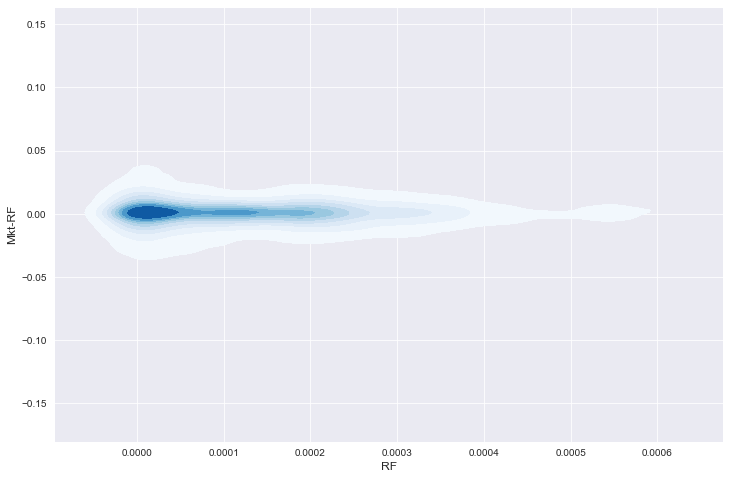

In [7]:
fig, ax = plt.subplots(1, figsize =(12, 8))

sns.kdeplot(df['RF'],df['Mkt-RF'], cmap ='Blues', 
            shade=True, shade_lowest = False, clip=(-1, 300))


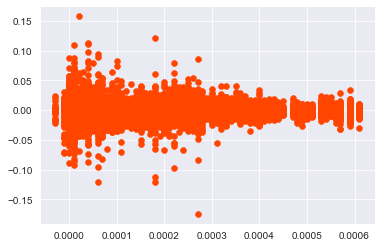

In [8]:
plt.scatter(df['RF'],df['Mkt-RF'], color ='orangered')

#### The distribution of stock market returns


 mu = 0.00 and sigma = 0.01



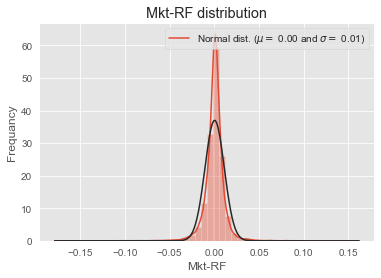

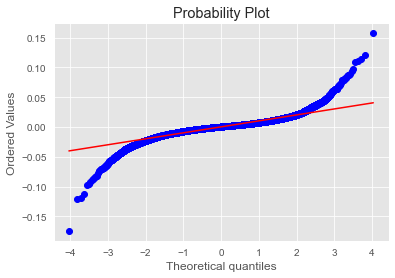

In [13]:
sns.distplot(df['Mkt-RF'], fit = norm)

# get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Mkt-RF'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequancy')
plt.title('Mkt-RF distribution')

# get the qq plot
fig = plt.figure()
res = stats.probplot(df['Mkt-RF'], plot=plt)
plt.show()

In [14]:
# Skewness and kurtosis
print('Skewness: %f' % df['Mkt-RF'].skew())
print('Kurtosis: %f' % df['Mkt-RF'].kurt())

Skewness: -0.164808
Kurtosis: 16.972171



 mu = 0.00 and sigma = 0.00



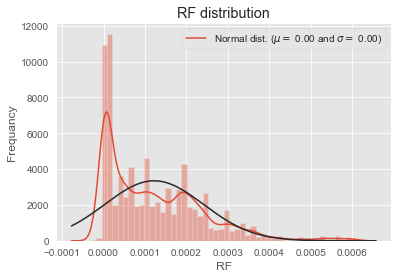

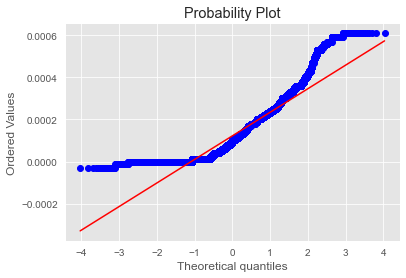

In [15]:
sns.distplot(df['RF'], fit = norm)

# get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['RF'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequancy')
plt.title('RF distribution')

# get the qq plot
fig = plt.figure()
res = stats.probplot(df['RF'], plot=plt)
plt.show()

In [16]:
# Skewness and kurtosis
print('Skewness: %f' % df['RF'].skew())
print('Kurtosis: %f' % df['RF'].kurt())

Skewness: 1.161727
Kurtosis: 1.409800


The target variables are not normally distributed. If we want to build (linear) models, we need to transform this variable and make it more normally distributed. 

### Question 2:
Visualize how $1 invested at the beginning would grow over-time!

In [9]:
# add rish-free rate to excess returns:
df["Mkt"] = df["Mkt-RF"]+df["RF"]

Text(0.5, 1.0, 'Inverstment grows over-time')

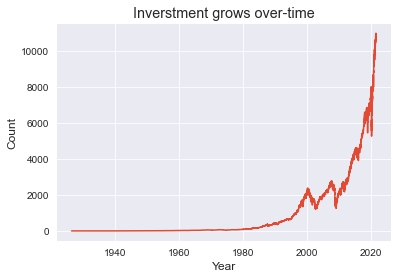

In [10]:
# Visualize the daily cumulative simple returns
plt.plot(((df["Mkt"]+1).cumprod()))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Inverstment grows over-time')

Text(0.5, 1.0, 'Inverstment grows over-time (log)')

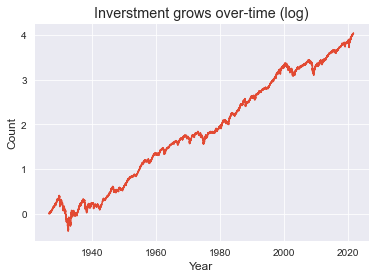

In [12]:
plt.plot(np.log10((df["Mkt"]+1).cumprod()))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Inverstment grows over-time (log)')

#### We can see from this chart that if we had invested $1 at the beginning, and sold it now, we would have made over 10,000 times our initial investment.

### Question 3:
Bootstrap simulation of 25 years with 10,000 iterations ( or however much your computer can handle in RAM )

a.	sample returns of 25 years from the main dataset with replacement ( feel free to use the daily equivalent of years if you do not group into years. Or better yet, show both )

b.	show a visualization of the bootstrap results by drawing #2 for every possible path of this bootstrap

c.	calculate the CAGR (https://www.investopedia.com/terms/c/cagr.asp) and show a histogram distribution from this bootstrap 

d.	the red lines are the 5th and 95th percentiles ( feel free to add anything that you may find meaningful)

      i.	perhaps “realized” #2 observations in a different color ( various 25 year returns the market actually experienced )

## Bootstrapping
So what is Bootstrapping and how does it differ? Well Bootstrapping also uses historic returns as a model input, but this time they are used more explicitly. Rather than calculating the underlying characteristics of the returns and then plugging those into a parametric model, we actually generate our data by sampling from the historic return distribution itself.

It is important to note here that Bootstrapping in involves “replacement” and falls under the notion of a “sampling with replacement” method.

That means that when a random sample is extracted from the historic return distribution, it is not “thrown away” and removed from the “hat” as it were, but rather it is replaced and put back in order that it may possibly be chosen again during the following sampling extractions.

This is a crucial point to note as it results in a fundamentally different outcome that if one was to “sample without replacement” and each data point were to be removed from the sample once chosen at any point.

The logic behind the Bootstrapping method is that if we use sampling with replacement, then each sample that is drawn, if random, will have the same chance of appearing as it would in “real life” – i.e. as it would in the actual markets for that particular stock (this again relies on the assumption that the future return distribution will retain the same characteristics as the historic return distribution the samples are being drawn from. That is to say both the future and past return distributions are drawn from the same “population”).


In [44]:
# choose 5000 iterations based on my laptop.
bootstrap_samples = 5000

In [45]:
# 25*252 = (25 years)*(252 is stock trading days in America per year)
simulated_returns = [(df["Mkt"].sample(25*252,replace=True)+1).cumprod() for i in range(bootstrap_samples)]
sorted_simulated_returns = np.array(sorted(simulated_returns, key = lambda x: x[-1]))

Text(0.5, 1.0, 'Bootstrap')

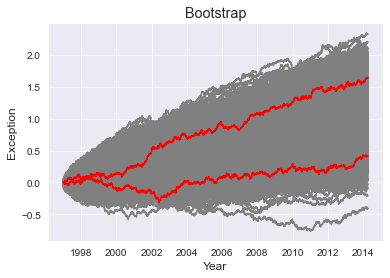

In [51]:
# use the daily equivalent of years 
fake_date = pd.date_range("1997-01-01", periods=252*25, freq="D")
for simulated_return in map(np.log10, sorted_simulated_returns):
  plt.plot(fake_date, simulated_return, color='grey')

plt.plot(fake_date, np.log10(sorted_simulated_returns[bootstrap_samples//20]), color='red')
plt.plot(fake_date, np.log10(sorted_simulated_returns[bootstrap_samples*19//20]), color='red')

plt.xlabel('Year')
plt.ylabel('Exception')
plt.title('Bootstrap')

### The compound annual growth rate (CAGR)
The compound annual growth rate (CAGR) is the rate of return (RoR) that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each period of the investment’s life span.

Formula and Calculation of the Compound Annual Growth Rate (CAGR)
\begin{aligned} &CAGR= \left ( \frac{EV}{BV} \right ) ^{\frac{1}{n}}-1\\ &\textbf{where:}\\ &EV = \text{Ending value}\\ &BV = \text{Beginning value}\\ &n = \text{Number of years} \end{aligned} 
​
  

where:
EV=Ending value

BV=Beginning value

n=Number of years
​
 


To calculate the CAGR of an investment:


1. Divide the value of an investment at the end of the period by its value at the beginning of that period.

2. Raise the result to an exponent of one divided by the number of years.

3. Subtract one from the subsequent result.

In [52]:
# def the CAGR based on the formula above.
def cagr(arr):
  return ((arr[-1]/arr[0])**(1/25))-1

In [53]:
CAGR = np.array(list(map(cagr,sorted_simulated_returns)))

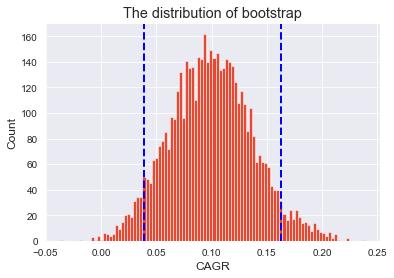

In [54]:
plt.hist(CAGR, bins=100, label="CAGR")
plt.axvline(np.percentile(CAGR,5), color='b', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(CAGR,95), color='b', linestyle='dashed', linewidth=2)
plt.xlabel('CAGR')
plt.ylabel('Count')
plt.title('The distribution of bootstrap')
plt.show()

In [55]:
# use numpy mean function to calculate the mean of the CAGR
print(round(np.mean(CAGR),3))

# take a look at a couple of “quantiles” of the potential price distribution, to get an idea of the likelyhood of very high or very low returns.
# use the numpy “percentile” function as follows to calculate the 5% and 95% quantiles:
print("5% quantile =",np.percentile(CAGR,5))
print("95% quantile =",np.percentile(CAGR,95))

0.1
5% quantile = 0.03909269411238221
95% quantile = 0.16250968445024278


###  Question 4
Assuming that stock-market returns are independent and random, how much confidence does one have that investing 100% in the market will result in a CAGR > 0%?

    a.	Please use your own data and not the attached image above


In [56]:
confidence = (CAGR[CAGR>0]).shape[0]/bootstrap_samples *100
confidence

99.78

### Question 5

Using the results of the bootstrap, please explain what might one expect from investing 100% in the stock-market?

a.	If one were to make adjustments to the investment, how might we measure the impact of the adjustment?

    i.	Try adjusting the strategy to be 50% Market, 50% Risk-free asset ( use the RF column and Mkt-Rf column to back-calculate the necessary information )
   
    ii.	Which strategy is better? Why?
   
b.	please attach commented code to generate the bootstrap and statistical analysis


In [57]:
# add a new col - 50-RF-50-MKT
df["50_RF_50_MKT"] = 0.5*df["RF"]+ 0.5*df["Mkt"]

Text(0.5, 1.0, 'Bootstrap simulation')

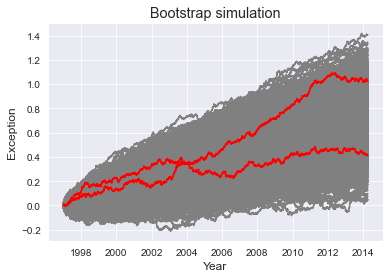

In [58]:
simulated_returns2 = [(df["50_RF_50_MKT"].sample(25*252,replace=True)+1).cumprod() for i in range(bootstrap_samples)]
sorted_simulated_returns2 = np.array(sorted(simulated_returns2, key = lambda x: x[-1]))
fake_date = pd.date_range("1997-01-01", periods=252*25, freq="D")
for simulated_return2 in map(np.log10, sorted_simulated_returns2):
  plt.plot(fake_date, simulated_return2, color='grey')

plt.plot(fake_date, np.log10(sorted_simulated_returns2[bootstrap_samples//20]), color='red')
plt.plot(fake_date, np.log10(sorted_simulated_returns2[bootstrap_samples*19//20]), color='red')

plt.xlabel('Year')
plt.ylabel('Exception')
plt.title('Bootstrap simulation')

In [59]:
CAGR2 = np.array(list(map(cagr,sorted_simulated_returns2)))

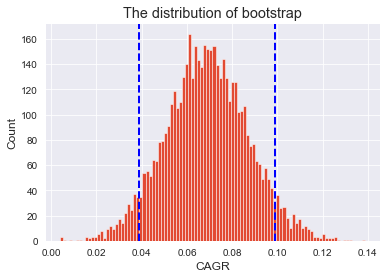

In [60]:
plt.hist(CAGR2, bins=100)
plt.axvline(np.percentile(CAGR2,5), color='b', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(CAGR2,95), color='b', linestyle='dashed', linewidth=2)
plt.xlabel('CAGR')
plt.ylabel('Count')
plt.title('The distribution of bootstrap')
plt.show()

In [61]:
#use numpy mean function to calculate the mean of the CAGR
print(round(np.mean(CAGR2),3))

# take a look at a couple of “quantiles” of the potential price distribution, to get an idea of the likelyhood of very high or very low returns.
# use the numpy “percentile” function as follows to calculate the 5% and 95% quantiles:
print("5% quantile =",np.percentile(CAGR2,5))
print("95% quantile =",np.percentile(CAGR2,95))

0.069
5% quantile = 0.03873965747207159
95% quantile = 0.09891696373651138


In [62]:
confidence = (CAGR2[CAGR2>0]).shape[0]/bootstrap_samples *100
confidence

100.0

####  Which strategy is better? Why?

I think it depends: 

1. If you are more consertive, 50% Market, 50% Risk-free asset will be a better strategy, because the confidence is 100, the mean of CAGR is 0.069, the 5% and 95% quantiles price distribution is [0.039, 0.099], and the expection of 5th and 95th percentiles in bootstrap simulation plot is [0.22, 1.03]. 

2. If you are more risk, you can choose the first strategy that is no adjusting, because the confidence is 99.64, which is less than 100, the mean of CAGR is 0.1, the 5% and 95% quantiles price distribution is [0.039, 0.163], and the expection of 5th and 95th percentiles in bootstrap simulation plot is [0.4, 1.7].